In [2]:
!pip install yfinance --quiet

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
stock_symbol = 'GOOG'
data = yf.download(stock_symbol, start='2020-01-01', end='2024-12-31')

/tmp/ipython-input-4-3487877785.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [5]:
data = data[['Open', 'High', 'Low', 'Volume', 'Close']]
data.dropna(inplace=True)
data['Next_Close'] = data['Close'].shift(-1)  # Target is next day's Close
data.dropna(inplace=True)

In [6]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)


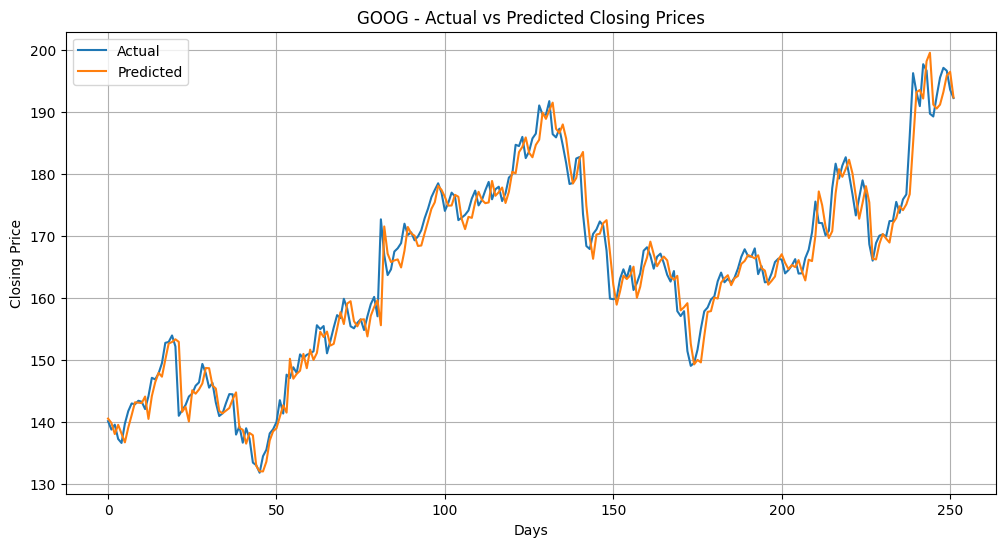

In [9]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'{stock_symbol} - Actual vs Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 3.11


In [11]:
# Add predictions to the test data
results = X_test.copy()
results['Actual_Close'] = y_test.values
results['Predicted_Close'] = y_pred
results.to_csv(f'{stock_symbol}_predictions.csv')
print("Predictions saved to CSV!")

Predictions saved to CSV!
